<a href="https://colab.research.google.com/github/TChen90/TensorFlow/blob/master/Constant_tensors_and_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

All-ones or all-zeros tensors

In [2]:
x = tf.ones(shape=(2, 1))  # Equivalent to np.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [3]:
x = tf.zeros(shape=(2, 1))  # Equivalent to np.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

Random tensors

In [4]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)  # Tensor of random values drawn from a normal distribution with mean 0 and std 1. Equivalent to np.random.normal(size=(3,1), loc=0, scale=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-0.13591936],
       [-1.0183889 ],
       [ 0.65863156]], dtype=float32)>

In [5]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)  # Tensor of random values drawn from a uniform distribution between 0 and 1. Equivalent to np.random.uniform(size=(3,1), low=0, high=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.2345314 ],
       [0.38027096],
       [0.9597671 ]], dtype=float32)>

A significant difference between NumPy arrays and TensorFlow tensors is that TensorFlow tensors aren’t assignable: they’re constant.

NumPy arrays are assignable

In [0]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0

Try to do the same thing in TensorFlow: you will get an error, "EagerTensor object does not support item assignment"

In [7]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0

TypeError: ignored

To train a model, we’ll need to update its state, which is a set of tensors. If tensors aren’t assignable, how do we do it, then? That’s where variables come in. tf.Variable is the class meant to manage modifiable state in TensorFlow.

Creating a Variable

In [8]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.3766401 ],
       [-0.81083393],
       [-1.9053744 ]], dtype=float32)>

The state of a variable can be modified via its assign method:

In [9]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

Assigning a value to a subset of a Variable

In [10]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Using assign_add

In [11]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

### An end-to-end example: a linear classifier in pure TensorFlow

In [0]:
# Generating two classes of random points in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [0]:
# Stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [0]:
# Generating the corresponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

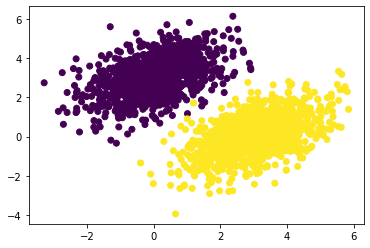

In [15]:
# Plotting the two point classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [0]:
# Creating the linear classifier variables
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [0]:
# The forward pass function
def model(inputs):
    return tf.matmul(inputs, W) + b

In [0]:
# The mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [0]:
# The training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [20]:
# The batch training loop
for step in range(20):
    loss = training_step(inputs, targets)
    print('Loss at step %d: %.4f' % (step, loss))

Loss at step 0: 4.4169
Loss at step 1: 0.6057
Loss at step 2: 0.2073
Loss at step 3: 0.1397
Loss at step 4: 0.1221
Loss at step 5: 0.1126
Loss at step 6: 0.1049
Loss at step 7: 0.0980
Loss at step 8: 0.0917
Loss at step 9: 0.0860
Loss at step 10: 0.0808
Loss at step 11: 0.0760
Loss at step 12: 0.0717
Loss at step 13: 0.0677
Loss at step 14: 0.0640
Loss at step 15: 0.0607
Loss at step 16: 0.0577
Loss at step 17: 0.0549
Loss at step 18: 0.0524
Loss at step 19: 0.0501


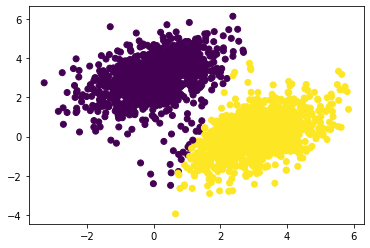

In [21]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

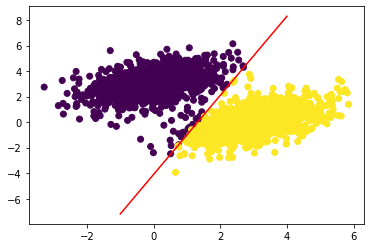

In [22]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)